## Original Stuff

In [ ]:
!pip install biopython py3Dmol pymol-open-source requests

  Using cached biopython-1.85-cp313-cp313-win_amd64.whl.metadata (13 kB)
Using cached biopython-1.85-cp313-cp313-win_amd64.whl (2.8 MB)
   ---------------------------------------- 0.0/7.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.3 MB 7.6 MB/s eta 0:00:01
   ----------------------- ---------------- 4.2/7.3 MB 14.9 MB/s eta 0:00:01
   ----------------------- ---------------- 4.2/7.3 MB 14.9 MB/s eta 0:00:01
   ----------------------- ---------------- 4.2/7.3 MB 14.9 MB/s eta 0:00:01
   ---------------------------------------- 7.3/7.3 MB 7.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ------------------ --------------------- 5.8/12.8 MB 30.4 MB/s eta 0:00:01
   ------------------------------------ --- 11.5/12.8 MB 29.3 MB/s eta 0:00:01
   ---------------------------------------- 12.8/12.8 MB 27.0 MB/s eta 0:00:00

   ---------- ----------------------------- 1/4 [numpy]
   ---------- ----------------------------- 1/4 [


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### download structure

In [1]:
import requests

pdb_id = "1MBN"
url = f"https://files.rcsb.org/download/{pdb_id}.cif"
response = requests.get(url)
with open(f"{pdb_id}.cif", "w") as f:
    f.write(response.text)

### load the structure

In [2]:
from Bio.PDB import MMCIFParser

parser = MMCIFParser()
structure = parser.get_structure("1MBN", "1MBN.cif")

### loop through structure

In [3]:
for model in structure:
    for chain in model:
        print(chain.id, "has", len(chain), "residues")
        for res in chain:
            if res.id[0] != " ":
                print(" HETATM:", res.get_resname(), res.id)

A has 155 residues
 HETATM: OH ('H_OH', 154, ' ')
 HETATM: HEM ('H_HEM', 155, ' ')


## 1. Retrieve and Parse Structures

In [12]:
# 01_Retrieve_and_Parse_Structures.ipynb

# Install dependencies (uncomment if running in Colab or a new environment)
# !pip install biopython requests

from Bio.PDB import PDBList, MMCIFParser
import os
import requests

# --- Download structure using direct URL (recommended) ---
pdb_id = "1MBN"
url = f"https://files.rcsb.org/download/{pdb_id}.cif"
response = requests.get(url)
with open(f"{pdb_id}.cif", "w") as f:
    f.write(response.text)
print(f"Downloaded {pdb_id}.cif")

# --- Parse structure with Biopython ---
parser = MMCIFParser()
structure = parser.get_structure(pdb_id, f"{pdb_id}.cif")

# --- Print summary: models, chains, residues, ligands ---
for model in structure:
    print(f"Model {model.id}:")
    for chain in model:
        residues = list(chain)
        print(f" Chain {chain.id} has {len(residues)} residues")
        for res in residues:
            if res.id[0] != " ":
                print(f"  HETATM: {res.get_resname()} {res.id}")

# --- Extract sequence (one-letter code) ---
from Bio.SeqUtils import seq1
seq = ""
for res in structure[0]["A"]:
    if res.id[0] == " ":
        try:
            seq += seq1(res.get_resname())
        except Exception:
            seq += "X"
print(f"\nSequence (Chain A):\n{seq}")


Downloaded 1MBN.cif
Model 0:
 Chain A has 155 residues
  HETATM: OH ('H_OH', 154, ' ')
  HETATM: HEM ('H_HEM', 155, ' ')

Sequence (Chain A):
VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRFKHLKTEAEMKASEDLKKHGVTVLTALGAILKKKGHHEAELKPLAQSHATKHKIPIKYLEFISEAIIHVLHSRHPGDFGADAQGAMNKALELFRKDIAAKYKELGYQG


## 2. Structure Exploration

Amino acid composition: Counter({'LYS': 19, 'LEU': 18, 'ALA': 17, 'GLU': 14, 'HIS': 12, 'GLY': 11, 'ILE': 9, 'VAL': 8, 'ASP': 7, 'SER': 6, 'PHE': 6, 'GLN': 5, 'THR': 5, 'ARG': 4, 'PRO': 4, 'TYR': 3, 'TRP': 2, 'MET': 2, 'ASN': 1})


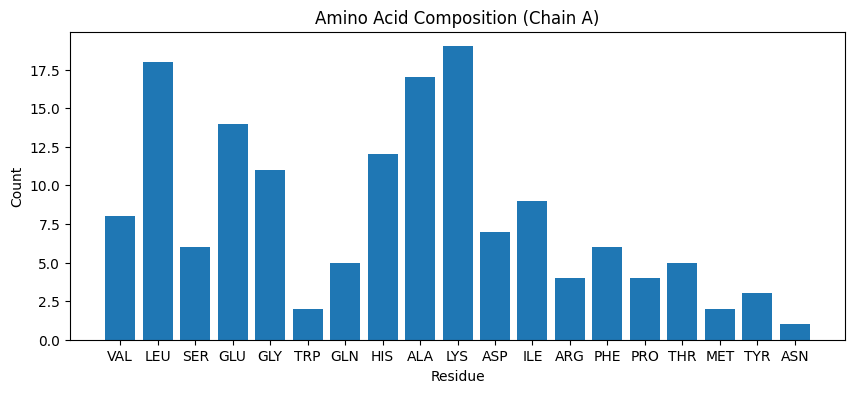


Non-standard residues/ligands:
OH ('H_OH', 154, ' ')
HEM ('H_HEM', 155, ' ')


In [13]:
# 02_Structure_Exploration.ipynb

# !pip install biopython matplotlib

from Bio.PDB import MMCIFParser
import matplotlib.pyplot as plt

pdb_id = "1MBN"
parser = MMCIFParser()
structure = parser.get_structure(pdb_id, f"{pdb_id}.cif")

# --- Amino acid composition ---
from collections import Counter
aa_counts = Counter()
for res in structure[0]["A"]:
    if res.id[0] == " ":
        aa_counts[res.get_resname()] += 1
print("Amino acid composition:", aa_counts)

# --- Plot composition ---
labels = list(aa_counts.keys())
values = [aa_counts[k] for k in labels]
plt.figure(figsize=(10,4))
plt.bar(labels, values)
plt.title("Amino Acid Composition (Chain A)")
plt.xlabel("Residue")
plt.ylabel("Count")
plt.show()

# --- List modified residues/ligands ---
print("\nNon-standard residues/ligands:")
for res in structure[0]["A"]:
    if res.id[0] != " ":
        print(res.get_resname(), res.id)


### 3. Visualization in Jupyter (py3Dmol)

In [14]:
# 03_Visualization_in_Notebook.ipynb

# !pip install py3Dmol

import py3Dmol

pdb_id = "1MBN"
with open(f"{pdb_id}.cif") as f:
    cif_data = f.read()

view = py3Dmol.view(width=600, height=400)
view.addModel(cif_data, "cif")
view.setStyle({'cartoon': {'color': 'spectrum'}})
view.addStyle({'resn': 'HEM'}, {'stick': {}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## 4. Protein–Ligand Interaction Analysis

In [15]:
# 04_Protein_Ligand_Interactions.ipynb

# !pip install biopython py3Dmol

from Bio.PDB import MMCIFParser, NeighborSearch
import py3Dmol

pdb_id = "1HVR"  # Example: HIV protease with inhibitor
url = f"https://files.rcsb.org/download/{pdb_id}.cif"
import requests
with open(f"{pdb_id}.cif", "w") as f:
    f.write(requests.get(url).text)

parser = MMCIFParser()
structure = parser.get_structure(pdb_id, f"{pdb_id}.cif")

# --- Find ligand (non-standard residue) ---
ligand = None
for res in structure[0].get_residues():
    if res.id[0] != " " and res.get_resname() not in ["HOH"]:
        ligand = res
        break
print(f"Ligand: {ligand.get_resname()} at {ligand.id}")

# --- Neighbor search for protein-ligand contacts ---
protein_atoms = [atom for atom in structure.get_atoms() if atom.get_parent().id[0] == " "]
ns = NeighborSearch(protein_atoms)
ligand_atoms = list(ligand.get_atoms())
neighbor_residues = set()
for atom in ligand_atoms:
    for neighbor in ns.search(atom.coord, 5.0):
        res = neighbor.get_parent()
        if res.id[0] == " ":
            neighbor_residues.add((res.get_parent().id, res.id[1], res.get_resname()))
print("Residues within 5Å of ligand:")
for chain, resnum, resname in sorted(neighbor_residues):
    print(f" Chain {chain} {resname} {resnum}")

# --- Visualize binding site ---
with open(f"{pdb_id}.cif") as f:
    cif_data = f.read()
view = py3Dmol.view(width=600, height=400)
view.addModel(cif_data, "cif")
view.setStyle({'cartoon': {'color': 'grey'}})
view.addStyle({'resn': ligand.get_resname()}, {'stick': {'colorscheme': 'greenCarbon'}})
for chain, resnum, resname in neighbor_residues:
    view.addStyle({'chain': chain, 'resi': str(resnum)}, {'stick': {'colorscheme': 'magentaCarbon'}})
view.zoomTo({'resn': ligand.get_resname()})
view.show()

Ligand: CSO at ('H_CSO', 67, ' ')
Residues within 5Å of ligand:
 Chain A PRO 1
 Chain A VAL 11
 Chain A THR 12
 Chain A ILE 13
 Chain A GLU 65
 Chain A ILE 66
 Chain A GLY 68
 Chain A HIS 69
 Chain B PHE 99


c:\Users\WALLKE\pyenv\vision\Lib\site-packages\Bio\PDB\StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1844.
  warnings.warn(


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## 5. Protein–Protein Interface Analysis

In [18]:
# 05_Protein_Protein_Interface.ipynb

# !pip install biopython py3Dmol

from Bio.PDB import MMCIFParser, NeighborSearch
import py3Dmol

pdb_id = "1IGC"  # Antibody-antigen complex
url = f"https://files.rcsb.org/download/{pdb_id}.cif"
import requests
with open(f"{pdb_id}.cif", "w") as f:
    f.write(requests.get(url).text)

parser = MMCIFParser()
structure = parser.get_structure(pdb_id, f"{pdb_id}.cif")

# --- Define two chains (A: antibody, C: antigen) ---
print("Available chains:", [chain.id for chain in structure[0]])

chainA = structure[0]["H"]  # Heavy chain
chainB = structure[0]["L"]  # Light chain
chainC = structure[0]["A"] # Antigen

atomsA = [atom for atom in chainA.get_atoms() if atom.get_parent().id[0] == " "]
atomsC = [atom for atom in chainC.get_atoms() if atom.get_parent().id[0] == " "]

nsC = NeighborSearch(atomsC)
interfaceA = set()
for atom in atomsA:
    for neighbor in nsC.search(atom.coord, 5.0):
        res = neighbor.get_parent()
        interfaceA.add((res.get_parent().id, res.id[1], res.get_resname()))
print("Antigen interface residues (Chain C):")
for chain, resnum, resname in sorted(interfaceA):
    print(f" Chain {chain} {resname} {resnum}")

# --- Visualize interface ---
with open(f"{pdb_id}.cif") as f:
    cif_data = f.read()
view = py3Dmol.view(width=600, height=400)
view.addModel(cif_data, "cif")
view.setStyle({'chain': 'A'}, {'cartoon': {'color': 'blue'}})
view.setStyle({'chain': 'C'}, {'cartoon': {'color': 'red'}})
for chain, resnum, resname in interfaceA:
    view.addStyle({'chain': chain, 'resi': str(resnum)}, {'stick': {'colorscheme': 'magentaCarbon'}})
view.zoomTo({'chain': 'C'})
view.show()

Available chains: ['L', 'H', 'A']
Antigen interface residues (Chain C):
 Chain A ILE 12
 Chain A LYS 15
 Chain A THR 16
 Chain A LEU 17
 Chain A LYS 18
 Chain A GLY 19
 Chain A GLU 20
 Chain A THR 21
 Chain A THR 22
 Chain A TYR 38
 Chain A ASP 41
 Chain A ASN 42


c:\Users\WALLKE\pyenv\vision\Lib\site-packages\Bio\PDB\StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 3772.
  warnings.warn(
c:\Users\WALLKE\pyenv\vision\Lib\site-packages\Bio\PDB\StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 3935.
  warnings.warn(
c:\Users\WALLKE\pyenv\vision\Lib\site-packages\Bio\PDB\StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4080.
  warnings.warn(


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## 6. AlphaFold Prediction & Confidence Analysis

Matplotlib is building the font cache; this may take a moment.


Downloaded AlphaFold model for P01308


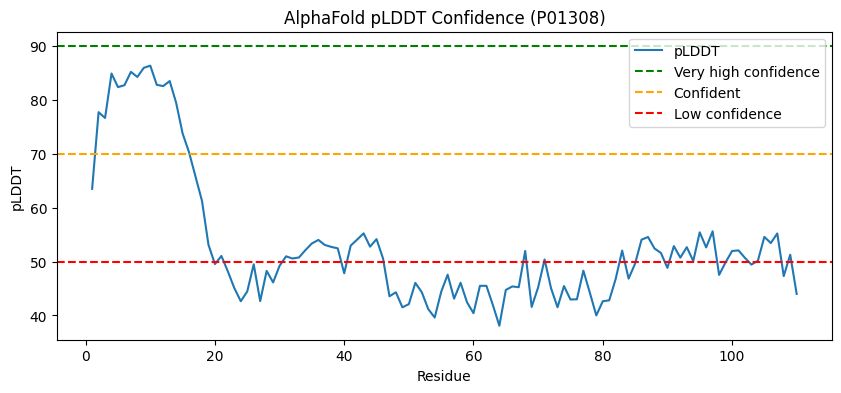

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [10]:
# 06_AlphaFold_Prediction_Analysis.ipynb

# !pip install biopython py3Dmol matplotlib requests

import requests
from Bio.PDB import PDBParser
import matplotlib.pyplot as plt
import py3Dmol

# --- Download AlphaFold model from AlphaFold DB ---
uniprot_id = "P01308"  # Example: Human insulin
af_url = f"https://alphafold.ebi.ac.uk/files/AF-{uniprot_id}-F1-model_v4.pdb"
r = requests.get(af_url)
with open(f"{uniprot_id}_AF.pdb", "w") as f:
    f.write(r.text)
print(f"Downloaded AlphaFold model for {uniprot_id}")

# --- Parse structure and extract pLDDT (B-factor) ---
parser = PDBParser(QUIET=True)
structure = parser.get_structure(uniprot_id, f"{uniprot_id}_AF.pdb")
plddt_scores = []
res_indices = []
for model in structure:
    for chain in model:
        for res in chain:
            if res.id[0] == " ":
                bvals = [atom.bfactor for atom in res]
                if bvals:
                    plddt_scores.append(sum(bvals)/len(bvals))
                    res_indices.append(res.id[1])

# --- Plot pLDDT confidence ---
plt.figure(figsize=(10,4))
plt.plot(res_indices, plddt_scores, label="pLDDT")
plt.axhline(90, color='green', linestyle='--', label='Very high confidence')
plt.axhline(70, color='orange', linestyle='--', label='Confident')
plt.axhline(50, color='red', linestyle='--', label='Low confidence')
plt.xlabel("Residue")
plt.ylabel("pLDDT")
plt.title(f"AlphaFold pLDDT Confidence ({uniprot_id})")
plt.legend()
plt.show()

# --- Visualize structure colored by pLDDT ---
with open(f"{uniprot_id}_AF.pdb") as f:
    pdb_data = f.read()
view = py3Dmol.view(width=600, height=400)
view.addModel(pdb_data, "pdb")
view.setStyle({'cartoon': {}})
view.setColorByProperty({'model': 0}, 'b')
view.zoomTo()
view.show()
